## Decision Tree Learning(결정 트리 학습법)

- Decision Tree learning: 어떤 항목에 대한 관측값과 목표값을 연결시켜주는 예측 모델 결정 트리를 사용한다. 이는 통계학과 데이터 마이닝, 기계 학습에서 사용하는 예측 모델링 방법 중 하나이다.

<예시> 타티타닉호 탑승객의 생존 여부를 나타내는 결정트리

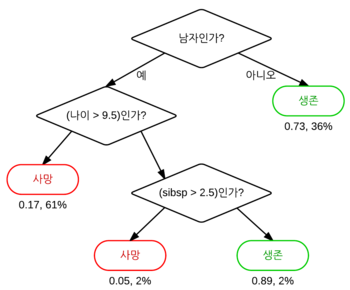

- 각 내부 노드들은 하나의 입력 변수에, 자녀 노드들로 이어지는 가지들은 입력 변수의 가능한 값에 대응된다. 잎 노드는 각 입력 변수들이 루트 노드로부터 잎 노드로 이어지는 경로에 해당되는 값들을 가질 때의 목표 변수 값에 해당된다.

- 모든 속성 들이 유한한 이산값들로 구성된 정의역을 가지고 있으며, 분류를 단일 대상 속성으로 지니고 있다고 간주한다. 분류의 정의역의 각 원소들은 클래스라고 불린다.

> 결정 트리 분석법 종류
 - Random Forest : 분류, 회귀 분간 등에 사용되는 앙상블 학습방법의 일종으로, 훈련 과정에서 구성한 다수의 결정 트리로부터 분류 또는 평균 예측치(회귀 분석)를 출력
 - Boost Tree
 - 회전 포레스트

출처: https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95

## Decision Tree의 기본 구조

결정트리(Decision Tree)는 머신러닝 알고리즘 중 하나로, flowchart 같은 구조를 가진다. 기본적으로 결정트리는 결정에 다다르기 위해 스무고개와 같은 예/아니오 질문을 이어나가면서 학습한다. 질문들은 다음과 같이 트리 구조로 나타낼 수 있다.

In [2]:
!pip install mglearn

     |████████████████████████████████| 540 kB 3.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=cbacf7c710c055c302d9348ba99d511c5d2fbe51cb2f51022dd913c5401baf9a
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


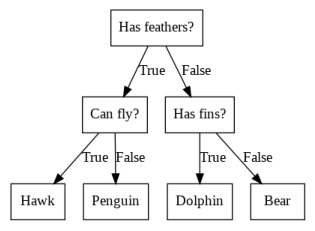

In [3]:
import mglearn 

mglearn.plots.plot_animal_tree()

각 네모칸을 트리의 노드(node)라고 하고, 마지막 노드는 리프 노드(leaf node)라고 부른다(혹은, 단말노드 terminal node).\
 에지(edge)는 질문의 답과 다음 질문을 연결한다.

In [7]:
from sklearn.datasets import load_breast_cancer  # scikit-learn의 breast cancer 데이터셋을 사용
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=123) 
# cancer.target값은 양성과 악성에 대응하는 0과 1
tree = DecisionTreeClassifier(random_state=123)
tree.fit(X_train, y_train)
print("test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

test set accuracy: 0.965


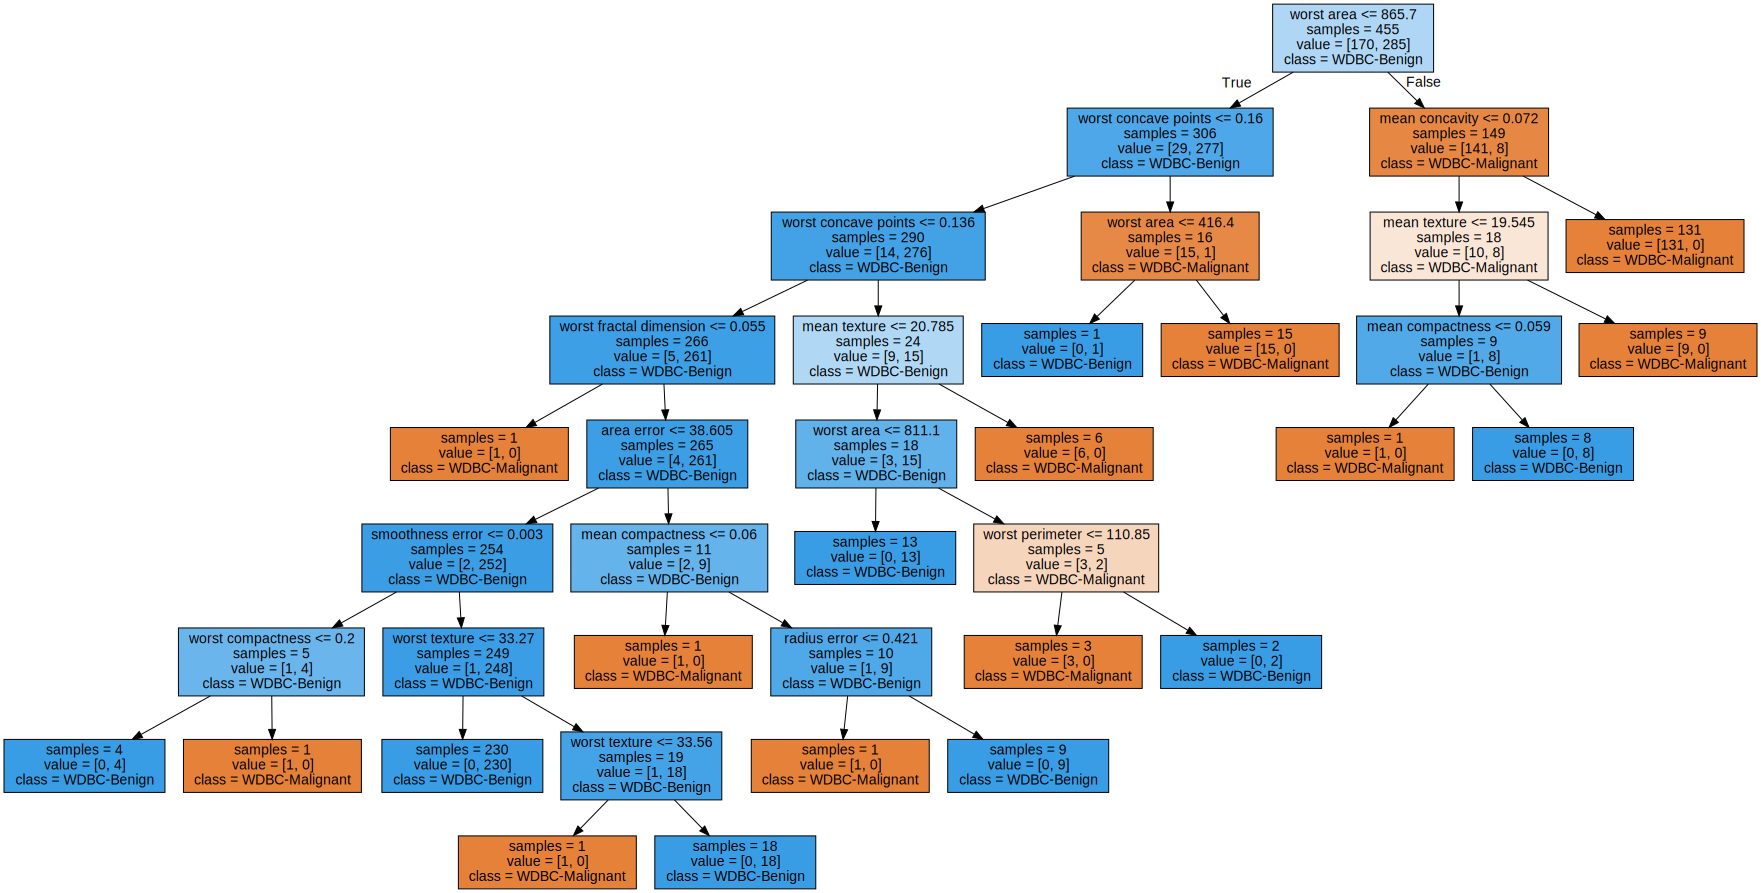

In [15]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file='breast_cancer_tree.dot', class_names=['WDBC-Malignant', 'WDBC-Benign'], feature_names=cancer.feature_names, impurity=False, filled=True)
with open("breast_cancer_tree.dot") as f:
    tree_graph = f.read()
graph = graphviz.Source(tree_graph)
display(graph)

위의 그래프처럼 루트 노드에서부터 분기를 이루면서 가장  많은 정보를 담을 수 있도록 계층적으로 영역을 분할해간다.\
예측(회귀 분석) 문제에도 트리를 사용할 수 있다.

test set accuracy(R^2 determination): 0.15795709914946876


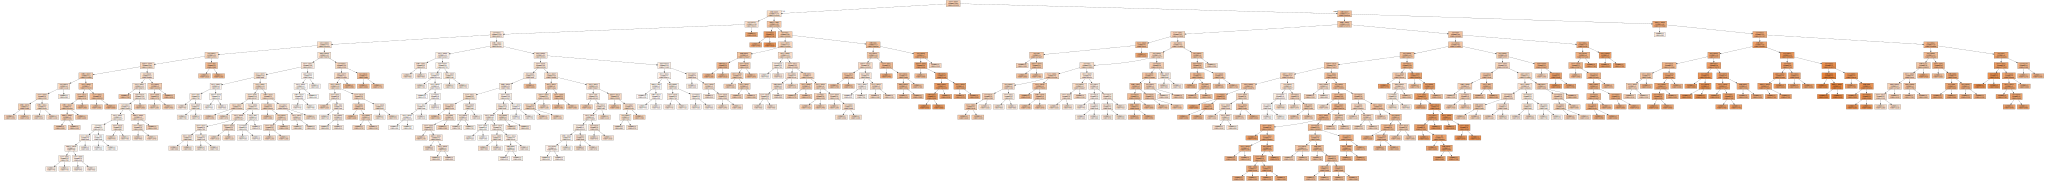

In [16]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=123)
tree = DecisionTreeRegressor(random_state=123)
tree.fit(X_train, y_train)
print("test set accuracy(R^2 determination): {}".format(tree.score(X_test, y_test))) # Regressor Tree에서는 score함수가 accuracy 기반이 아니라 결정계수(R^2) 이다.
export_graphviz(tree, out_file='diabetes_tree.dot', feature_names=diabetes.feature_names, impurity=False, filled=True)
with open("diabetes_tree.dot") as f:
    tree_graph = f.read()
display(graphviz.Source(tree_graph))

예측을 하려면 각 노드의 테스트 결과에 따라 트리를 탐색해나가고 새로운 데이터 포인트에 해당되는 리프 노드를 찾는다. 찾은 리프 노드들의\
훈련 데이터 평균값이 이 데이터 포인트의 출력이 된다.

## Decision Tree Algorithm

- ID3 algorithm 
> Decision Tree의 가장 초창기 모델 중 하나 이다. Decision Tree의 핵심은 변별력이 좋은 질문을 위에서부터 세팅하는 것인데, 이를 위해서 ID3는 정보이론의 정보량과 엔트로피를 활용했다.
    - 정보량: 어떤 사건이 가지고 있는 정보의 양.  
> $I(x) = log_2\frac{1}{p(x)}$, $p(x)$는 사건 $x$가 발생할 확률이다. 발생할 확률이 1에 가까울 수록 정보량은 0에 가까울수록 정보량은 무한히 커진다.
    - 엔트로피: 정보량의 기댓값(평균)을 나타낸다. 발생한 사건들의 정보량을 모두 구해서 (가중)평균낸 것이다.\
> $E(S) = Σ^{c}_{i=1}p_iI(x_i) = Σ^{c}_{i=1}p_ilog_2\frac{1}{p(x_i)} = Σ^{c}_{i=1}p_ilog_2\frac{1}{p(i)}$\
여기서 $S$는 이미 발생한 사건의 모음을 의미한다. 그리고 $c$는 사건의 갯수다. 엔트로피가 크다는 것은 평균 정보량이 크다는 것인데, 대개 사건들이 일어날 확률이 비슷한 경우에 엔트로피가 크다.

두사건이 반반 확률로 일어날 떄의 엔트로피가 가장 크다는 것을 알 수 있다. 엔트로피가 크면 클수록 분류하기가 어려워지기 때문에 엔트로피가 가장 작은 feature를 상위 노드에 위치시켜야한다. 이것이 ID3의 핵심 포인트다.
- 정보획득량: $IG(S,A)=E(S)-E(S|A)$, 여기서 $A$는 속성을 의미한다. 어떤 속성을 가지고 분류했을 때 가장 엔트로피가 작은지, 즉 정보획득량이 큰지를 알아 내야한다.

- CART algorithm
> ID3와 비슷하지만, Classification뿐 아니라 Regression도 가능한 알고리즘이며, 몇 가지 특징이 있다.
    - 불순도 : Gini index,
$G(S) = 1 - Σ^{c}_{i=1}p_i^2$, S: 이미 발생한 사건의 모음, c: 사건의 갯수
    - Binary Tree
    - Regression Tree


- Decision Tree의 한계 : train dataset에만 의하여 트리가 완성되기 때문에 overfitting문제에 취약하다. 이 단점을 극복하기 위해 고안된 알고리즘이 여러개의 모델을 비교해서 결과를 종합하는 방식인 앙상블 기법의 일종, Random Forest이다.

> 참고: Random Forest을 이용한 와인 품질 분류 https://heytech.tistory.com/149#:~:text=Random%20Forest%EB%8A%94%20%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95,Bagging)%20%EB%B0%A9%EC%8B%9D%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%A9%EB%8B%88%EB%8B%A4.